In [3]:
import pandas as pd
import scipy
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
df = pd.read_csv('numerai_training_data.csv')

In [5]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
count,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,...,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000,96320.000000
mean,0.500878,0.512885,0.506545,0.481297,0.480721,0.507575,0.485784,0.488085,0.497232,0.509756,...,0.495812,0.487271,0.499383,0.499264,0.503023,0.489291,0.510676,0.496797,0.484802,0.505170
std,0.288139,0.287648,0.288900,0.289451,0.288815,0.290777,0.288760,0.285725,0.294387,0.290289,...,0.288942,0.292422,0.296308,0.287728,0.288853,0.288286,0.287050,0.279139,0.291899,0.499976
min,0.000000,0.000060,0.000000,0.000029,0.000056,0.000230,0.000000,0.000000,0.000067,0.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000207,0.000000
25%,0.251224,0.266438,0.254415,0.226809,0.222160,0.262825,0.239098,0.236121,0.237862,0.255412,...,0.233429,0.231386,0.243646,0.244975,0.259354,0.239981,0.263245,0.261287,0.223937,0.000000
50%,0.493747,0.518174,0.511365,0.469518,0.482973,0.502920,0.477959,0.493175,0.501310,0.512071,...,0.515181,0.464956,0.493341,0.511940,0.510200,0.481893,0.530513,0.487047,0.486590,1.000000
75%,0.746817,0.762671,0.760346,0.720406,0.723145,0.751586,0.734163,0.726348,0.763610,0.768322,...,0.735741,0.738742,0.764017,0.753246,0.749991,0.735929,0.753773,0.735611,0.718825,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
for i in range(1, 22):
    for j in range(i + 1, 22):
        f0 = 'feature%d' % i
        f1 = 'feature%d' % j
        print('f0 = {}, f1 = {}, pv = {}'.format(f0, f1, scipy.stats.pearsonr(df[f0], df[f1])[0]))
        

f0 = feature1, f1 = feature2, pv = -0.297628632596
f0 = feature1, f1 = feature3, pv = -0.283417346
f0 = feature1, f1 = feature4, pv = 0.239346865491
f0 = feature1, f1 = feature5, pv = 0.0239114538179
f0 = feature1, f1 = feature6, pv = 0.0444582053853
f0 = feature1, f1 = feature7, pv = -0.281173708628
f0 = feature1, f1 = feature8, pv = 0.779425524414
f0 = feature1, f1 = feature9, pv = 0.291935047314
f0 = feature1, f1 = feature10, pv = 0.303143941241
f0 = feature1, f1 = feature11, pv = 0.306409123507
f0 = feature1, f1 = feature12, pv = -0.171042416336
f0 = feature1, f1 = feature13, pv = 0.856791296553
f0 = feature1, f1 = feature14, pv = 0.297029289651
f0 = feature1, f1 = feature15, pv = 0.000323405076896
f0 = feature1, f1 = feature16, pv = -0.190195735126
f0 = feature1, f1 = feature17, pv = -0.346213785131
f0 = feature1, f1 = feature18, pv = -0.141386772566
f0 = feature1, f1 = feature19, pv = -0.286285025736
f0 = feature1, f1 = feature20, pv = 0.340545635103
f0 = feature1, f1 = feature21

In [5]:
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, log_loss

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X, y = df.drop('target', axis = 1), df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [89]:
y_pred = clf.predict(X_test)

In [140]:
log_loss(y_pred, y_test)

16.382086070099035

In [74]:
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, oob_score=True)
clf.fit(X_train, y_train)
print clf.oob_score_

0.509045369601


In [88]:
clf = SVC(cache_size = 1200)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=1200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

In [166]:
model = Sequential()
model.add(Dense(output_dim=64, input_dim=21, activation='relu'))
model.add(Dense(output_dim=1, activation= 'relu'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

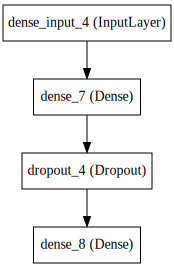

In [161]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [168]:
model.fit(X_train.values, y_train.values, nb_epoch=50, batch_size = 100, verbose = 1)

Epoch 1/50
77056/77056 [==============================] - 0s - loss: 0.7347 - acc: 0.5162     
Epoch 2/50
77056/77056 [==============================] - 0s - loss: 0.7294 - acc: 0.5165     
Epoch 3/50
77056/77056 [==============================] - 0s - loss: 0.7317 - acc: 0.5179     
Epoch 4/50
77056/77056 [==============================] - 0s - loss: 0.7294 - acc: 0.5198     
Epoch 5/50
77056/77056 [==============================] - 0s - loss: 0.7344 - acc: 0.5187     
Epoch 6/50
77056/77056 [==============================] - 0s - loss: 0.7311 - acc: 0.5198     
Epoch 7/50
77056/77056 [==============================] - 0s - loss: 0.7279 - acc: 0.5178     
Epoch 8/50
77056/77056 [==============================] - 0s - loss: 0.7276 - acc: 0.5188     
Epoch 9/50
77056/77056 [==============================] - 0s - loss: 0.7402 - acc: 0.5201     
Epoch 10/50
77056/77056 [==============================] - 0s - loss: 0.7362 - acc: 0.5191     
Epoch 11/50
77056/77056 [========================

KeyboardInterrupt: 

In [163]:
y_pred = model.predict(X_test.values)
y_pred = y_pred.reshape(-1)
y_pred_df = pd.DataFrame(y_pred)
print y_pred_df.describe()
print 'median = ', y_pred_df.median()[0]
y_pred[y_pred > y_pred_df.median()[0]] = 1
y_pred[y_pred <= y_pred_df.median()[0]] = 0

                  0
count  19264.000000
mean       0.511443
std        0.022988
min        0.315090
25%        0.501495
50%        0.510408
75%        0.523206
max        0.627154
median =  0.510407805443


In [164]:
log_loss(y_pred, y_test)

16.500420041692649

In [8]:
import xgboost as xgb

In [17]:
train_data = xgb.DMatrix(X_train.values, label = y_train.values)
test_data = xgb.DMatrix(X_test.values)

In [37]:
bst = xgb.train({'max_depth':5, 'eta':1, 'silent':1, 'objective':'binary:logistic' }, train_data, 50)

In [38]:
y_pred = bst.predict(test_data)
y_pred_df = pd.DataFrame(y_pred)
print y_pred_df.describe()
print 'median = ', y_pred_df.median()[0]
y_pred[y_pred > y_pred_df.median()[0]] = 1
y_pred[y_pred <= y_pred_df.median()[0]] = 0

                  0
count  19264.000000
mean       0.504394
std        0.150528
min        0.002778
25%        0.419897
50%        0.508869
75%        0.588558
max        0.996284
median =  0.508869051933


In [39]:
log_loss(y_pred, y_test)

17.06340324981014